In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords # Import the stop word list
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

sns.set() # Prettify all matplotlib plots
# nltk.download() # Download NLTK datasets

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
train_df = pd.read_csv('data/train.tsv', delimiter = '\t', encoding = 'utf-8')
test_df = pd.read_csv('data/test.tsv', delimiter = '\t', encoding = 'utf-8')

# Get some basic info
print("Train data dimensions: " + str(train_df.shape))
print("Train columns: " + str(train_df.columns.values))

print("Test data dimensions: " + str(test_df.shape))
print("Test columns: " + str(test_df.columns.values))


Train data dimensions: (156060, 4)
Train columns: ['PhraseId' 'SentenceId' 'Phrase' 'Sentiment']
Test data dimensions: (66292, 3)
Test columns: ['PhraseId' 'SentenceId' 'Phrase']


In [3]:
sample_submission_df = pd.read_csv('data/sampleSubmission.csv', delimiter = ',', encoding = 'utf-8')
print("Sample submission data dimensions: " + str(sample_submission_df.shape))
print("Sample submission columns: " + str(sample_submission_df.columns.values))

Sample submission data dimensions: (66292, 2)
Sample submission columns: ['PhraseId' 'Sentiment']


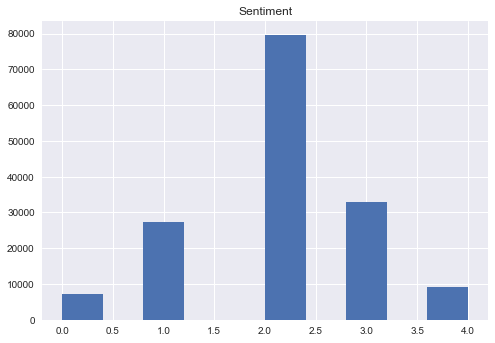

In [4]:
# Visualize the distribution of our dataset in sentiment.

train_df.hist(column = "Sentiment")
plt.show()

In [5]:
# Create a new column with the word count evaluated
train_df['phrase_length'] = train_df['Phrase'].str.len()

In [6]:
stops = set(stopwords.words("english")) 

def clean_df(df):
    df['phrase_cleaned'] = df['Phrase'].str.lower() # Lowercases the strings
    df['phrase_cleaned'] = df['phrase_cleaned'].str.split().apply(lambda x: " ".join([item for item in x if item not in stops]))
    
clean_df(train_df)

In [7]:
print(train_df['Phrase'][0])
print(train_df['phrase_cleaned'][0])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
series escapades demonstrating adage good goose also good gander , occasionally amuses none amounts much story .


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer = "word", \
    tokenizer = None, \
    preprocessor = None, \
    stop_words = None, \
    max_features = 5000)

train_data_features = vectorizer.fit_transform(train_df['phrase_cleaned']).toarray()
print(train_data_features.shape)

(156060, 5000)


In [9]:
# Take a look at the words in the vocabulary
vocab = np.array(vectorizer.get_feature_names())

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

dist_sort_idxs = dist.argsort()[::-1]
dist = dist[dist_sort_idxs]
vocab = vocab[dist_sort_idxs]

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

6733 film
6241 movie
3784 one
3190 like
2539 story
2438 rrb
2261 good
2098 lrb
1919 time
1882 characters
1872 much
1813 comedy
1718 life
1624 even
1605 little
1583 funny
1535 well
1529 way
1414 make
1345 movies
1338 director
1324 love
1305 new
1305 bad
1272 work
1253 enough
1218 us
1198 made
1180 old
1170 action
1168 two
1160 something
1151 would
1123 best
1114 never
1094 many
1073 people
1027 self
1019 makes
1018 character
997 world
992 first
986 may
985 see
985 plot
979 films
977 drama
969 could
920 better
917 audience
907 long
897 look
895 big
892 re
888 really
888 sense
884 man
881 feel
872 without
871 real
864 great
859 every
856 humor
826 screen
819 year
818 another
812 ever
811 minutes
810 get
789 hollywood
772 still
765 performances
760 cast
759 fun
750 human
725 family
724 nothing
718 hard
714 heart
712 less
710 performance
704 often
698 might
695 american
687 things
684 far
683 kind
667 moments
664 script
660 acting
659 seen
659 also
657 back
655 end
649 interesting
648 origi

85 chris
85 adolescent
85 haunting
85 realized
85 false
85 treasure
85 admirable
85 solondz
85 packed
85 sadness
85 stop
84 provides
84 determined
84 lazy
84 iranian
84 chinese
84 retread
84 acts
84 structure
84 consistently
84 tiny
84 english
84 aged
84 downright
84 japanese
84 imaginative
84 thinks
84 speaking
84 folks
84 damage
84 known
84 follow
84 bunch
84 screenwriting
83 tender
83 sum
83 hits
83 brought
83 endless
83 superb
83 teenagers
83 song
83 irritating
83 degree
83 appear
83 appears
83 punch
83 detail
83 adam
83 crimes
83 ridiculous
83 outrageous
83 trash
83 pack
83 mild
83 fat
83 territory
82 prove
82 dancing
82 direct
82 happens
82 absorbing
82 incredibly
82 assured
82 cult
82 jack
82 absolutely
82 fisher
82 necessary
82 blair
82 mention
82 proceedings
82 devastating
82 satisfied
82 opening
81 reach
81 excuse
81 image
81 frightening
81 unlikely
81 drawn
81 development
81 horrible
81 provoking
81 shocking
81 spooky
81 rush
81 rhythms
81 flair
81 type
81 lee
80 confusing
8

47 necessarily
47 winds
47 thumbs
47 wilson
47 redemption
47 chops
47 suited
47 burn
47 strikes
47 encouraging
47 twenty
47 unnerving
47 aspect
47 helps
47 motivated
47 emerge
46 consciously
46 town
46 cuts
46 equal
46 gave
46 dickens
46 ultra
46 unsentimental
46 heal
46 underbelly
46 eddie
46 incompetent
46 exposition
46 dawns
46 explosions
46 exceptional
46 infidelity
46 distinctive
46 dubbed
46 decade
46 demonstrates
46 drawing
46 surreal
46 search
46 campaign
46 weirdness
46 seats
46 paradiso
46 kiss
46 coffee
46 nose
46 clue
46 aware
46 alice
46 witherspoon
46 youth
46 profile
46 alienation
46 whale
46 palma
46 lightweight
46 rohmer
46 reluctant
46 blame
46 skip
46 miller
46 longing
46 sentence
46 stereotypical
46 pro
46 survive
46 philosophy
46 angle
46 shifting
46 3000
46 sobering
46 breezy
46 accent
45 barrel
45 building
45 church
45 firing
45 suburban
45 morality
45 lie
45 antics
45 incisive
45 protagonists
45 hanks
45 fellow
45 rocky
45 subculture
45 argue
45 stylized
45 show

32 distinct
32 pessimistic
31 indulgence
31 idealism
31 crane
31 compromise
31 wrestling
31 countless
31 segment
31 muster
31 adolescence
31 import
31 secretary
31 calculated
31 subplots
31 misses
31 senses
31 continuity
31 hollow
31 bands
31 hitchcockian
31 temple
31 breadth
31 darkness
31 singer
31 1970s
31 1999
31 bracing
31 showcase
31 grisly
31 88
31 versions
31 has
31 hawaiian
31 panache
31 crosses
31 slick
31 nerds
31 hidden
31 partner
31 shadyac
31 smack
31 smiles
31 row
31 misogyny
31 irresponsible
31 taymor
31 cliff
31 lavish
31 lewis
31 liberation
31 stabbing
31 maze
31 asian
31 cipher
31 randall
31 ramsay
31 chronicles
31 athletes
31 possess
31 available
31 avant
31 swinging
31 prophecies
31 program
31 sustained
31 proficient
31 prefer
31 reaches
31 believing
31 charge
31 spaces
31 pertinent
31 jagger
31 river
31 pg
31 phenomenal
31 philip
31 research
31 sugarman
31 julia
31 juliette
31 tediously
31 celebrity
31 regarding
31 technique
31 kennedy
31 kidman
31 obsessions
31 c

24 photo
24 siegel
24 civic
24 overexposed
24 disjointed
24 eats
24 paris
24 climate
24 peril
24 clashing
24 learning
24 goals
24 skewed
24 dashing
24 fitting
24 guide
24 clinic
24 plotless
24 dealers
24 brightly
24 sensuality
24 oddest
24 harbor
24 deals
24 zany
24 timed
24 sleeper
24 regardless
24 duration
24 exuberance
24 related
24 span
24 pearl
24 60
24 strengths
24 thirteen
24 selling
24 everlasting
24 swimming
24 excels
24 compared
24 emperor
24 alfred
24 superman
24 insecure
24 mcculloch
24 amid
24 ferocity
24 informed
24 exchange
24 infinitely
24 compare
24 consigned
24 voices
24 megaplex
24 evokes
24 puppet
24 devolves
24 traditionally
24 questionable
24 sons
24 attack
24 amazingly
24 undoubtedly
24 triumphs
24 astute
24 comprehend
24 fervently
24 qualify
24 puzzle
24 pushes
24 purposes
24 lovable
24 austerity
24 ambrose
24 formal
24 agonizing
24 everybody
24 gaza
24 underlying
24 aspires
24 vulnerable
24 preemptive
24 monotonous
24 wade
24 praises
24 subtlest
24 mistress
24 

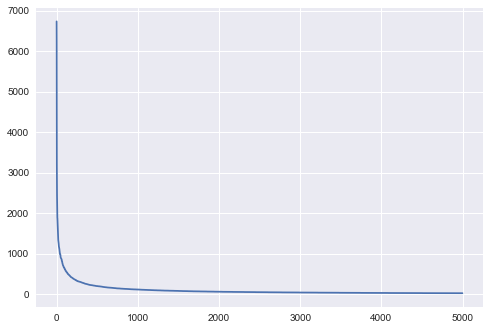

In [10]:
plt.plot(dist)
plt.show()

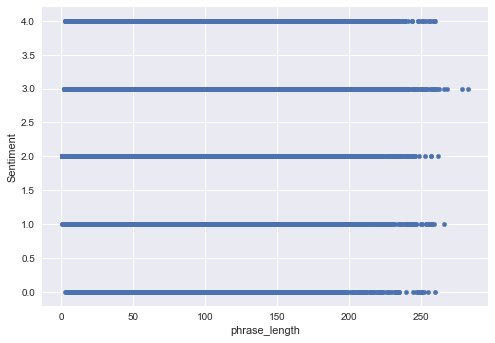

In [11]:
# Plot Sentiment vs phrase_length
train_df.plot(x='phrase_length', y='Sentiment', style='o', kind='scatter')
plt.show()

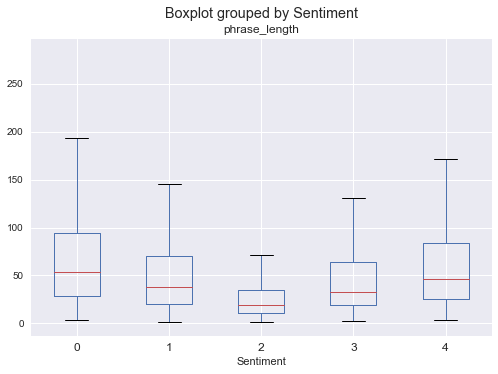

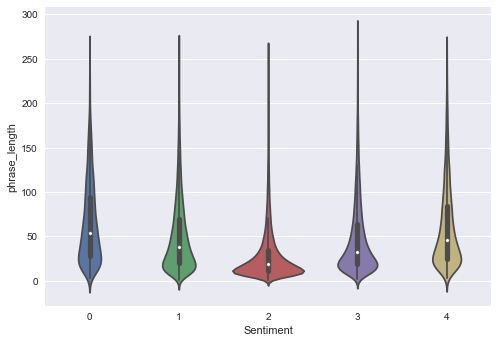

In [12]:
# That wasn't very helpful. Let's try a box plot instead.
train_df.boxplot(column='phrase_length', by='Sentiment')
plt.show()

ax = sns.violinplot(x="Sentiment", y="phrase_length", data=train_df)
plt.show()

Visualizing the phrase length along a sentiment reveals that neutral sentiment phrases are typically shorter and low-variance.

In [13]:
# bins = [0, 25, 50, 75, 100]
# categories = pd.cut(train_df['phrase_length'], bins)

std = train_df['phrase_length'].std()
std

38.154129861956434

In [14]:
# Split our data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop(['Sentiment'], axis = 1), 
    train_df['Sentiment'], 
    test_size = 0.2, 
    random_state = 42)

In [15]:
# Define a super basic model that only returns neutral sentiment
class NaiveModel():
    def predict(self, phrases):
        return np.full((len(phrases), 1), 2)

In [16]:
# Use the naive model to run a predication on our cross validation dataset
naive_model = NaiveModel()
predictions = naive_model.predict(train_df['Phrase'])
print(len(predictions))

156060


In [ ]:
# With these, we now have a basic benchmark that we want to outperform
print("Accuracy: " + str(metrics.accuracy_score(train_df['Sentiment'], predictions)))
print(metrics.classification_report(train_df['Sentiment'], predictions))

Accuracy: 0.50994489299
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      7072
          1       0.00      0.00      0.00     27273
          2       0.51      1.00      0.68     79582
          3       0.00      0.00      0.00     32927
          4       0.00      0.00      0.00      9206

avg / total       0.26      0.51      0.34    156060



/Users/hdavidzhu/miniconda3/envs/ml_is/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100, verbose=2) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit(train_data_features, train_df["Sentiment"])

Training the random forest...
building tree 1 of 100
